In [1]:
%load_ext autoreload
%autoreload 2
from optimizers import Nesterov_Optimizers
from sklearn.datasets import fetch_california_housing, load_boston, load_diabetes

import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt 
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
def get_coef_measures(X_train, y_train):
    Nesterov_accelerated = Nesterov_Optimizers()
    Nesterov_accelerated.fit(X_train, y_train, method="accelerated")
    acc_coef = Nesterov_accelerated.get_hist_coef()
    acc_measures = Nesterov_accelerated.get_objective_value()


    Nesterov_dual = Nesterov_Optimizers()
    Nesterov_dual.fit(X_train, y_train, method="dual_gradient")
    dual_coef = Nesterov_dual.get_hist_coef()
    dual_measures = Nesterov_dual.get_objective_value()


    Nesterov_gradient = Nesterov_Optimizers()
    Nesterov_gradient.fit(X_train, y_train, method="gradient")
    gradient_coef = Nesterov_gradient.get_hist_coef()
    gradient_measures = Nesterov_gradient.get_objective_value()
    
    return acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures

def get_rmse():
    gradient_rmse = [sqrt(mean_squared_error(np.dot(X, coef), y)) for coef in gradient_coef]
    dual_rmse = [sqrt(mean_squared_error(np.dot(X, coef), y)) for coef in dual_coef]
    acc_rmse = [sqrt(mean_squared_error(np.dot(X, coef), y)) for coef in acc_coef]
    
    return gradient_rmse, dual_rmse, acc_rmse

def get_imp_feat():
    gradient_feat=sum(gradient_coef[-1]!=0)
    dual_feat=sum(dual_coef[-1]!=0)
    acc_feat=sum(acc_coef[-1]!=0)
    return gradient_feat,dual_feat,acc_feat

def plot_measures(gradient_measure, dual_measure, acc_measure, title="Plot", xlim=None, ylim=None, mse=None):
    plt.rcParams['figure.figsize'] = (15,10)
    plt.rcParams['font.size'] = 20
    plt.rcParams['lines.linewidth'] = 4
    plt.title(title)
    plt.plot(gradient_measure, c='y', ls='-', label='Gradient')
    plt.plot(dual_measure, c='m', ls='--', label='Dual Gradient')
    plt.plot(acc_measure, c='b', ls='-.', label='Accelerated')
    plt.legend(title="Method",title_fontsize = 25)
    plt.ticklabel_format(useOffset=False, style='plain')
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    
    plt.xlabel("Iteration")
    if mse==1:
        plt.ylabel("Mean Squared Error")
    elif mse==2:
        plt.ylabel("Root Mean Squared Error")
    else:
        plt.ylabel("Objective function")
        
    #plt.savefig(f"fig/{title}.png")    
    plt.show()

### Problem 1

In [21]:
n_samples=500
n_features=50
n_informative=20
X, y, coef = datasets.make_regression(n_samples = n_samples,#number of samples
                                      n_features = n_features,#number of features
                                      n_informative = n_informative,#number of useful features
                                      noise = 10,#bias and standard deviation of the guassian noise
                                      coef = True #true coefficient used to generated the data
                                     )

In [22]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X, y)
gradient_rmse, dual_rmse, acc_rmse = get_rmse()

accelerated  early stopping at  51
dual_gradient  early stopping at  22
gradient  early stopping at  18


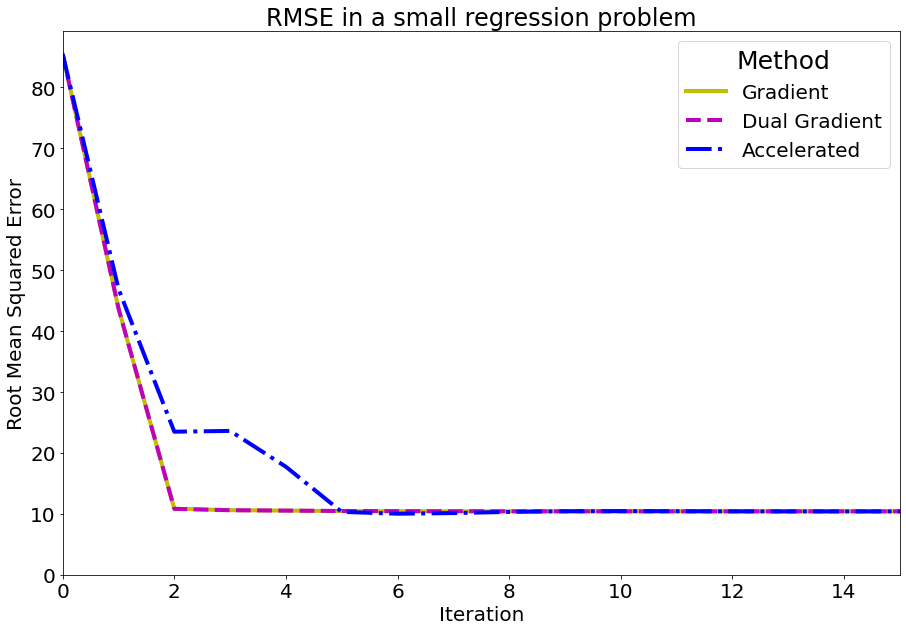

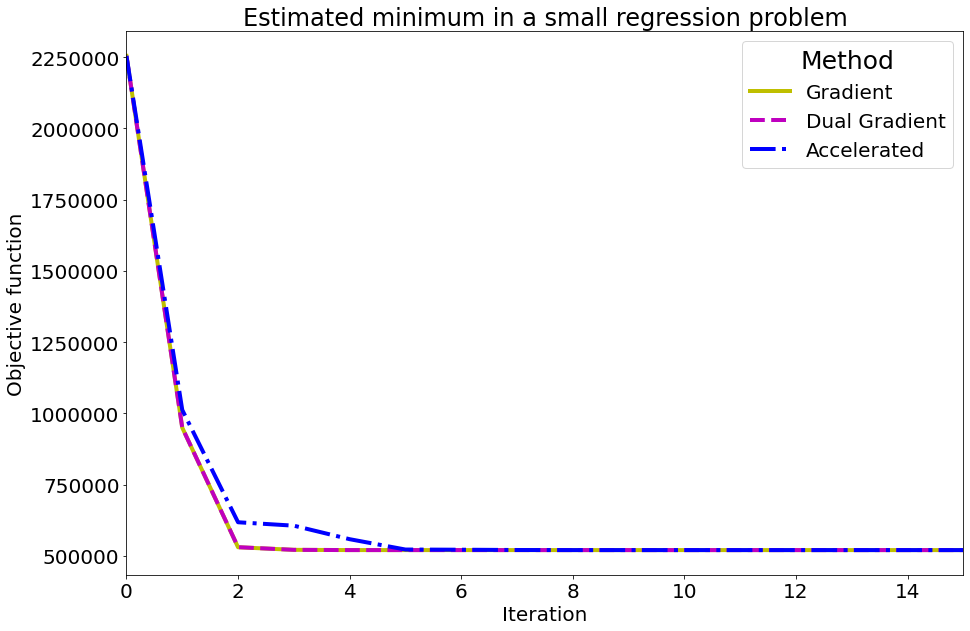

(21, 21, 21)


In [23]:
plot_measures(gradient_rmse, dual_rmse, acc_rmse, title="RMSE in a small regression problem", xlim=[0, 15], ylim=[0, None], mse=2)
plot_measures(gradient_measures, dual_measures, acc_measures, title="Estimated minimum in a small regression problem", xlim=[0, 15])
print(get_imp_feat())

### Problem 2

In [6]:
n_samples=5000
n_features=500
n_informative=125
X, y, coef = datasets.make_regression(n_samples = n_samples,#number of samples
                                      n_features = n_features,#number of features
                                      n_informative = n_informative,#number of useful features
                                      noise = 10,#bias and standard deviation of the guassian noise
                                      coef = True #true coefficient used to generated the data
                                      )

In [7]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X, y)
gradient_rmse, dual_rmse, acc_rmse = get_rmse()

accelerated  early stopping at  59
dual_gradient  early stopping at  21
gradient  early stopping at  21


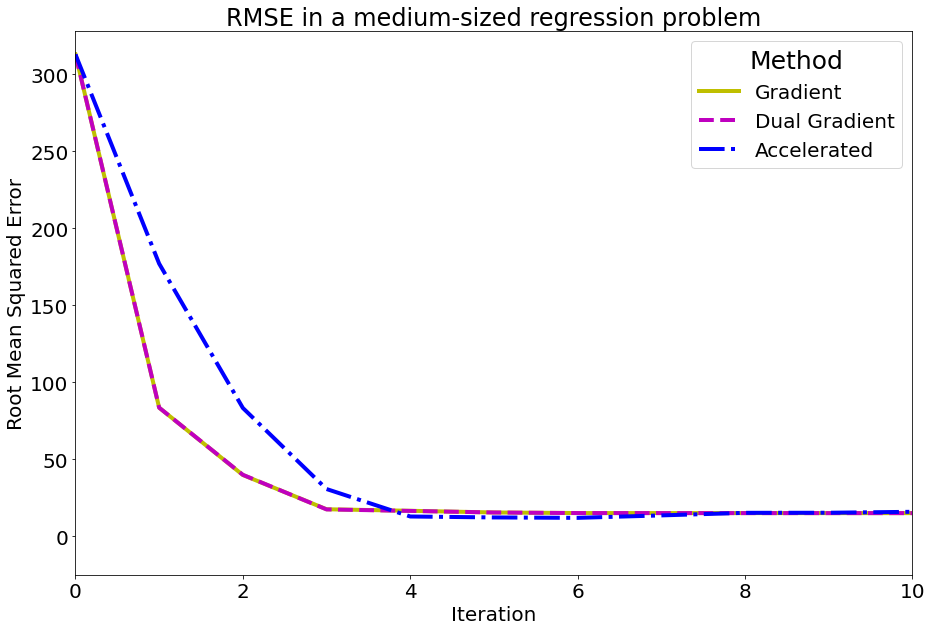

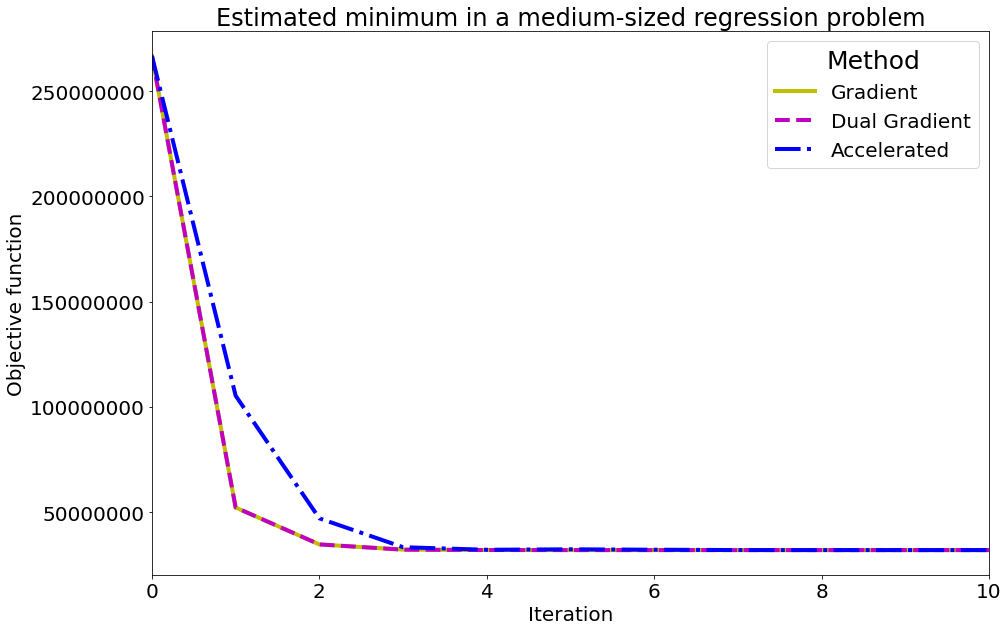

(124, 124, 124)


In [8]:
plot_measures(gradient_rmse, dual_rmse, acc_rmse, title="RMSE in a medium-sized regression problem", xlim=[0, 10], ylim=[-25, None], mse=2)
plot_measures(gradient_measures, dual_measures, acc_measures, title="Estimated minimum in a medium-sized regression problem", xlim=[0, 10])
print(get_imp_feat())

### Problem 3

In [9]:
n_samples=20000
n_features=1000
n_informative=150
X, y, coef = datasets.make_regression(n_samples = n_samples,#number of samples
                                      n_features = n_features,#number of features
                                      n_informative = n_informative,#number of useful features
                                      noise = 10,#bias and standard deviation of the guassian noise
                                      coef = True #true coefficient used to generated the data
                                      )

In [10]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X, y)
gradient_rmse, dual_rmse, acc_rmse = get_rmse()

accelerated  early stopping at  59
dual_gradient  early stopping at  27
gradient  early stopping at  20


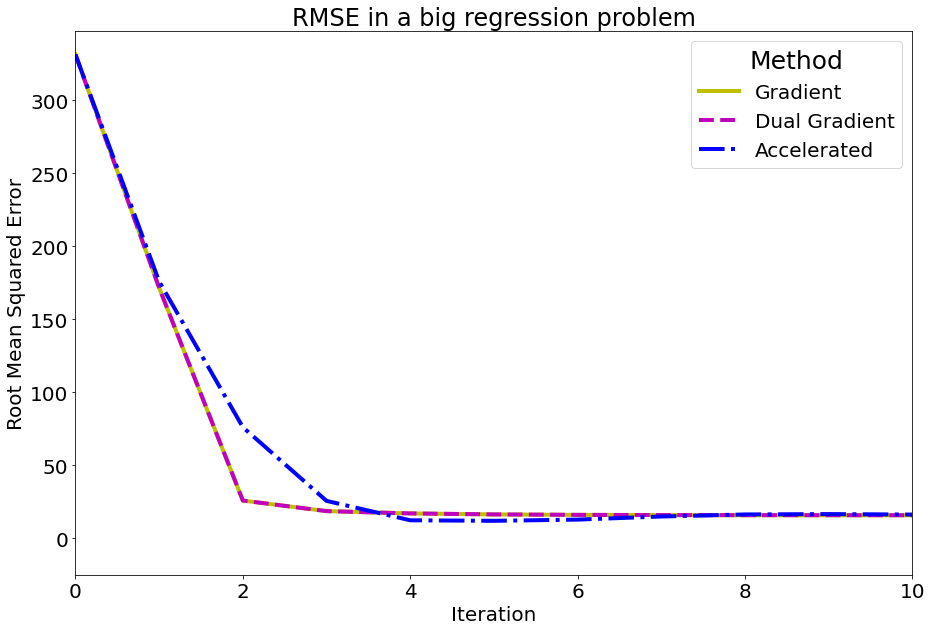

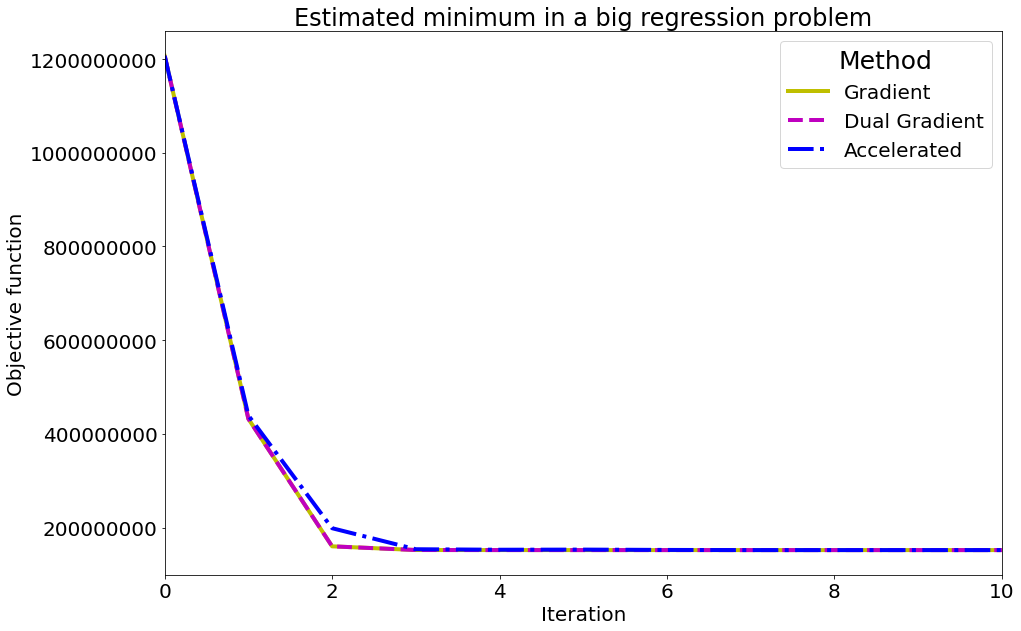

(148, 148, 148)


In [11]:
plot_measures(gradient_rmse, dual_rmse, acc_rmse, title="RMSE in a big regression problem", xlim=[0, 10], ylim=[-25, None], mse=2)
plot_measures(gradient_measures, dual_measures, acc_measures, title="Estimated minimum in a big regression problem", xlim=[0, 10])
print(get_imp_feat())

### Problem 4

In [12]:
X,y= load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [13]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X, y)
gradient_rmse, dual_rmse, acc_rmse = get_rmse()

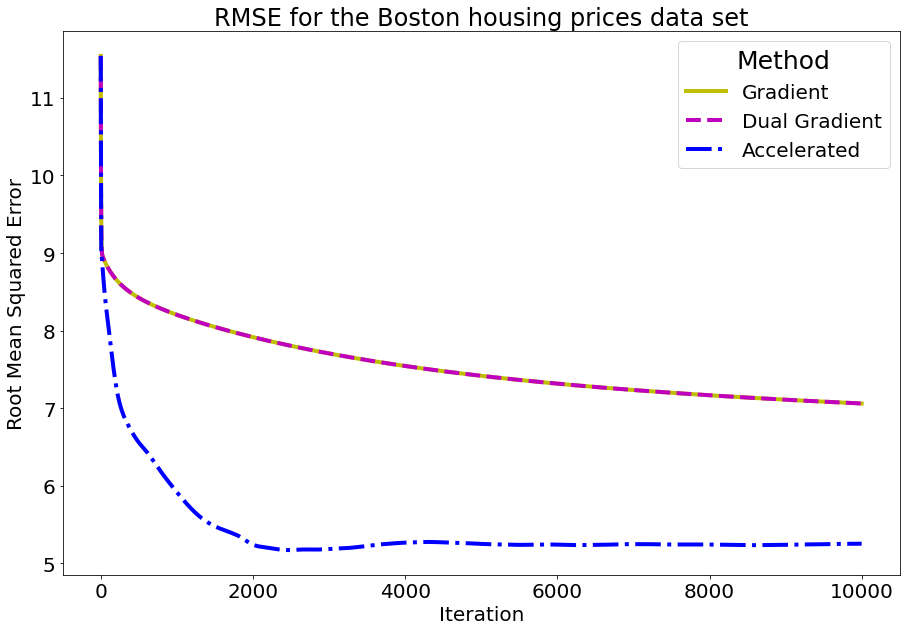

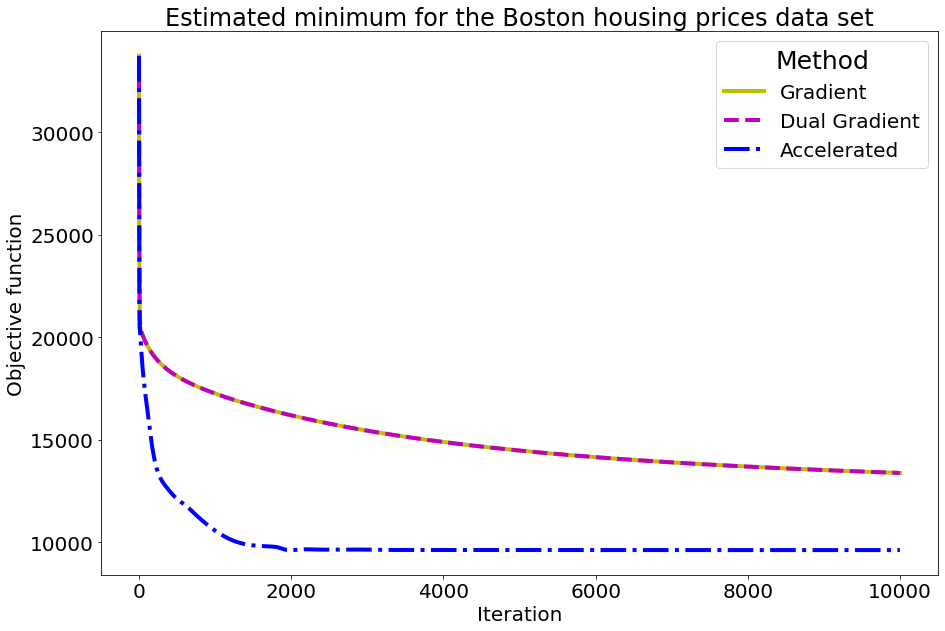

(9, 9, 10)


In [14]:
plot_measures(gradient_rmse, dual_rmse, acc_rmse, title="RMSE for the Boston housing prices data set", mse=2)
plot_measures(gradient_measures, dual_measures, acc_measures, title="Estimated minimum for the Boston housing prices data set")
print(get_imp_feat())

In [15]:
X,y = fetch_california_housing(return_X_y=True)

In [16]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X, y)
gradient_rmse, dual_rmse, acc_rmse = get_rmse()

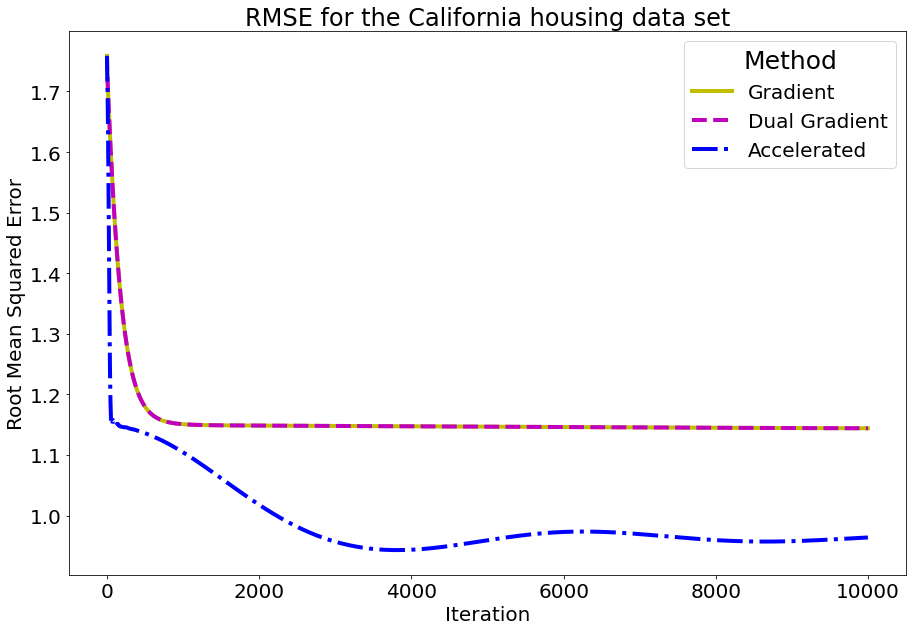

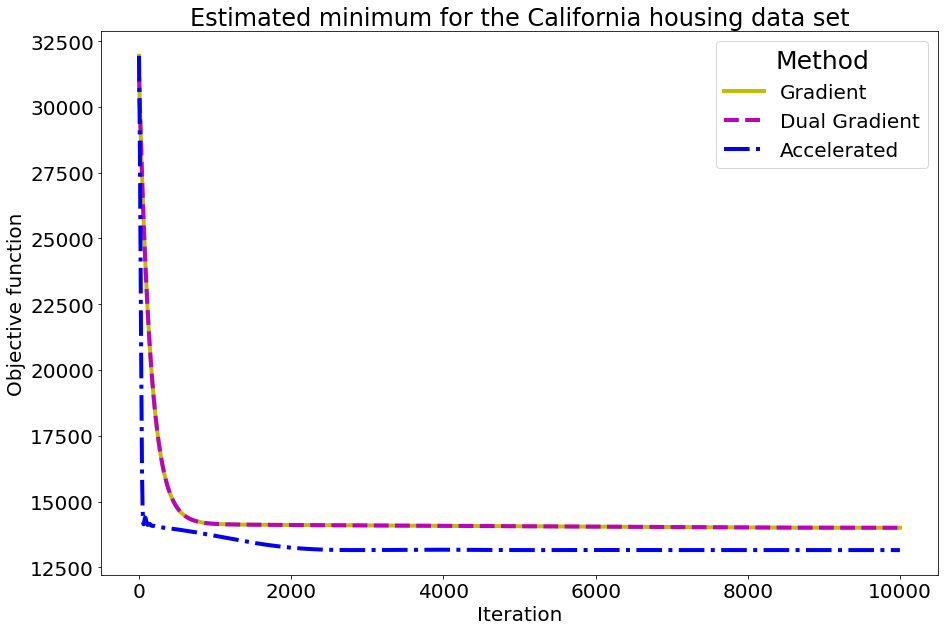

(4, 4, 4)


In [17]:
plot_measures(gradient_rmse, dual_rmse, acc_rmse, title="RMSE for the California housing data set", mse=2)
plot_measures(gradient_measures, dual_measures, acc_measures, title="Estimated minimum for the California housing data set")
print(get_imp_feat())